# Single Photon Counting Test

## Imports

In [1]:
import h5py
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import timeit

In [2]:
import pycentroids as centroids

In [3]:
help(centroids.find_photons)

Help on built-in function find_photons in module pycentroids:

find_photons(...) method of builtins.PyCapsule instance
    find_photons(images: numpy.ndarray[uint16], threshold: int=200, box: int=2, pixel_photon: int=10, overlap_max: int=0, sum_min: float=800, sum_max: float=1250) -> tuple
    
    Find photons



## Load test data

In [4]:
!test -f image040.h5 || curl -o image040.h5 https://centroids-data.s3.amazonaws.com/images.h5

In [5]:
data = np.asarray(h5py.File('images.h5', 'r')['data'])

In [6]:
data.shape

(40, 1612, 3304)

## Call the fast code for single photon counting

In [7]:
timeit.timeit("centroids.find_photons(data, 400, 2)", globals=globals(), number=1)

12.346638863

In [8]:
table, out = centroids.find_photons(data, 400, 2)

In [9]:
df = pd.DataFrame(table)

In [10]:
table.shape

(17296, 9)

In [11]:
out.shape

(40, 1612, 3304)

In [12]:
df

,0,1,2,3,4,5,6,7,8
0,619.0,866.0,619.214090,865.863346,619.212667,865.862500,1097.666667,160.733333,0.0
1,216.0,872.0,216.055261,872.041864,216.055000,872.040333,1194.333333,157.266667,0.0
2,514.0,872.0,514.054229,872.531633,514.053167,872.529833,1032.666667,158.733333,0.0
3,557.0,872.0,556.888181,872.429118,556.888167,872.429000,1046.333333,158.866667,0.0
4,672.0,872.0,672.156154,872.423454,672.155833,872.421667,1088.666667,159.733333,0.0
5,459.0,873.0,458.890335,872.632900,458.890000,872.631500,1076.000000,156.600000,0.0
6,470.0,873.0,470.541635,872.751325,470.540833,872.750667,880.666667,157.933333,0.0
7,592.0,873.0,592.514140,872.834412,592.513333,872.833167,978.333333,161.066667,0.0
8,706.0,873.0,705.961460,872.611562,705.959667,872.611333,986.000000,160.800000,0.0
9,716.0,873.0,716.022247,872.668521,716.022000,872.668167,899.000000,159.800000,0.0


## Plot the results 
### Whole image

<IPython.core.display.Javascript object>


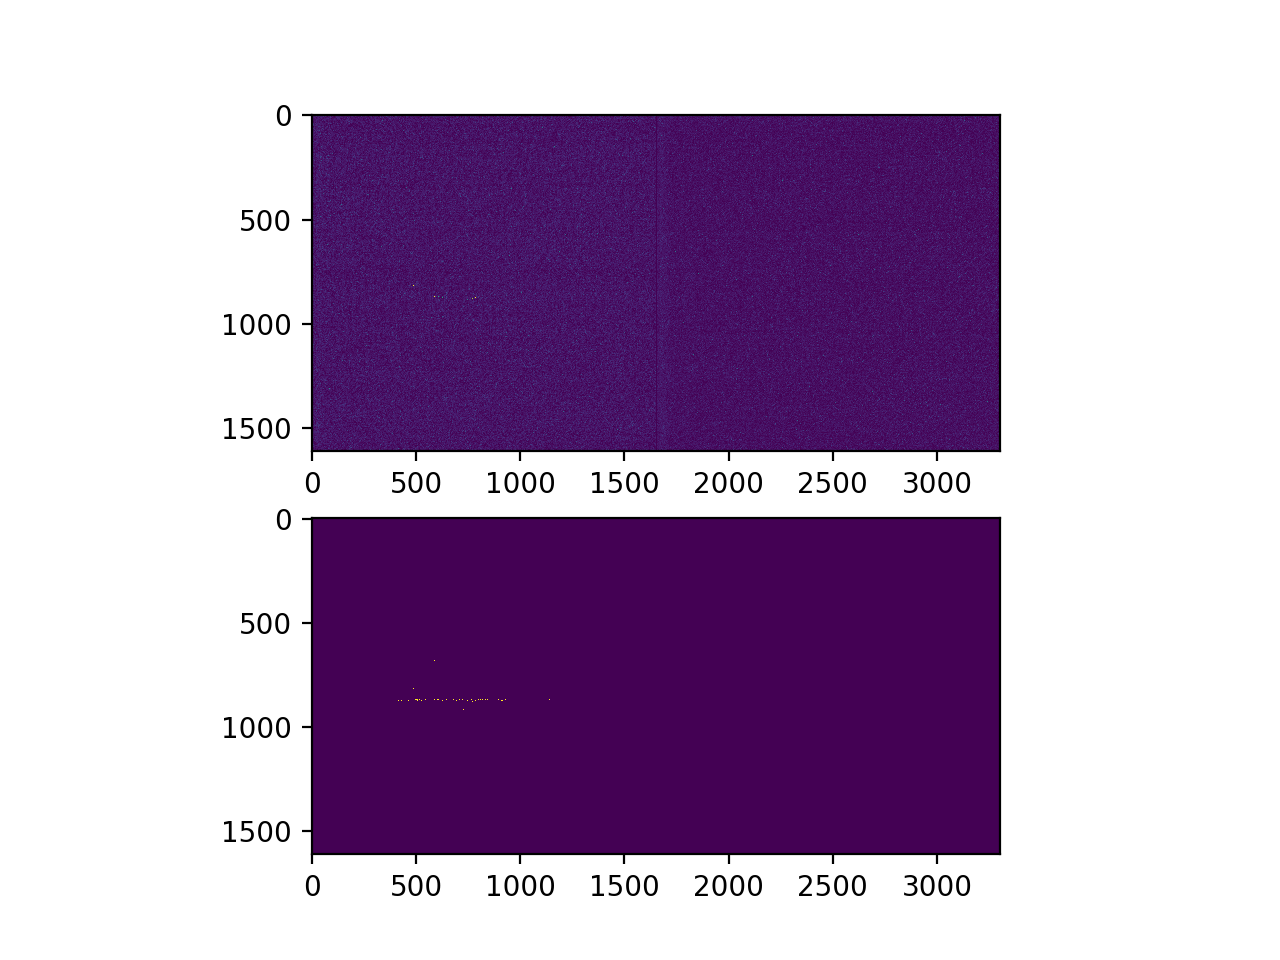

In [13]:
fig, ax = plt.subplots(2,1)
ax[0].imshow(data[-1], vmin=150, vmax=300)
ax[1].imshow(out[-1]>0)

## Selected part of the image

<IPython.core.display.Javascript object>


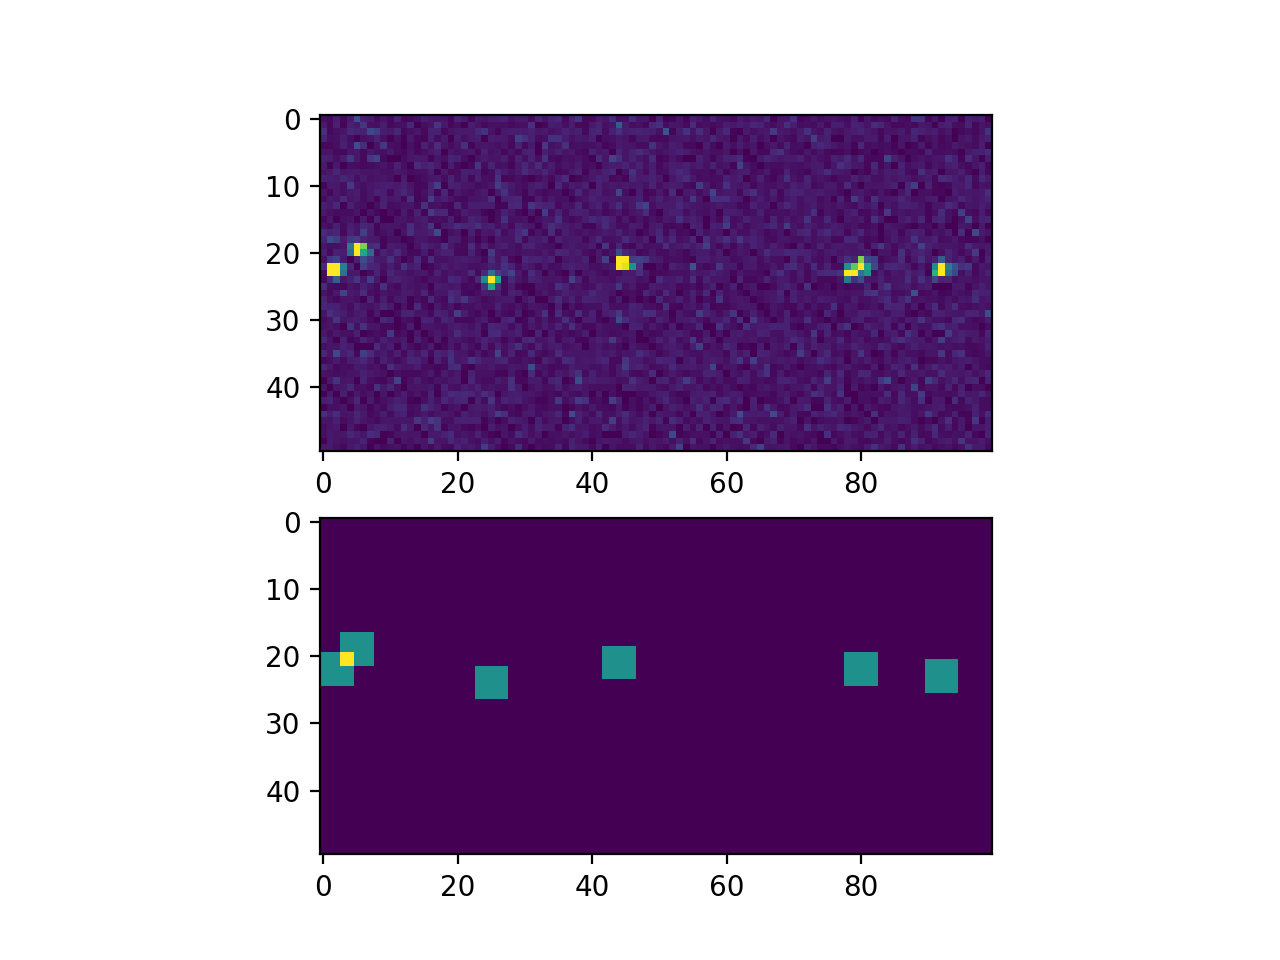

In [14]:
fig, ax = plt.subplots(2,1)
ax[0].imshow(data[-1,850:900,600:700], vmin=150, vmax=300)
ax[1].imshow(out[-1,850:900,600:700] & 0xFF)

<IPython.core.display.Javascript object>


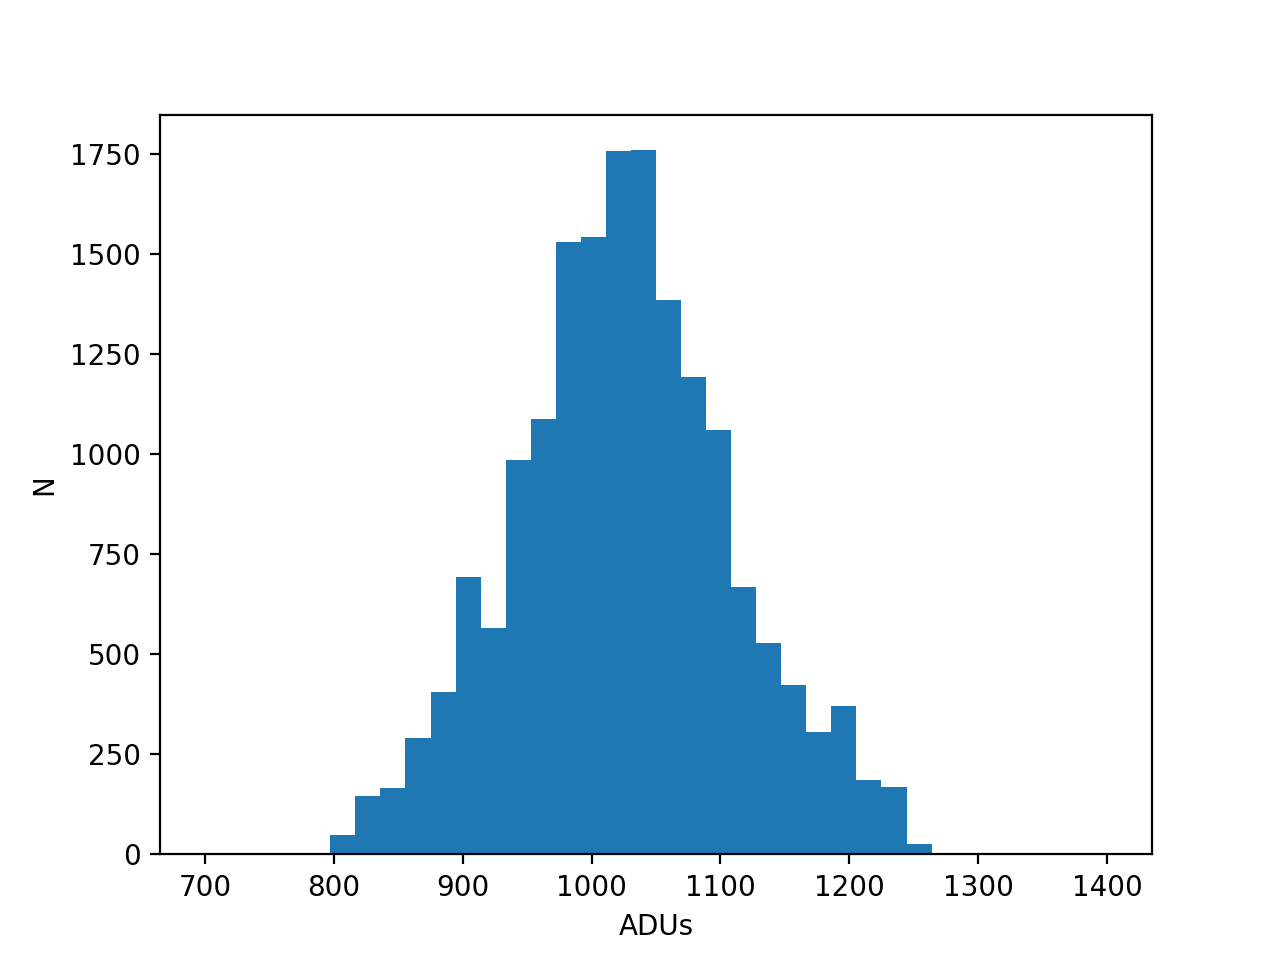

Text(0.5, 0, 'ADUs')

In [15]:
fig, ax = plt.subplots(1,1)
ax.hist(table[:,6], bins=36, range=(700, 1400))
ax.set_ylabel('N')
ax.set_xlabel('ADUs')

<IPython.core.display.Javascript object>


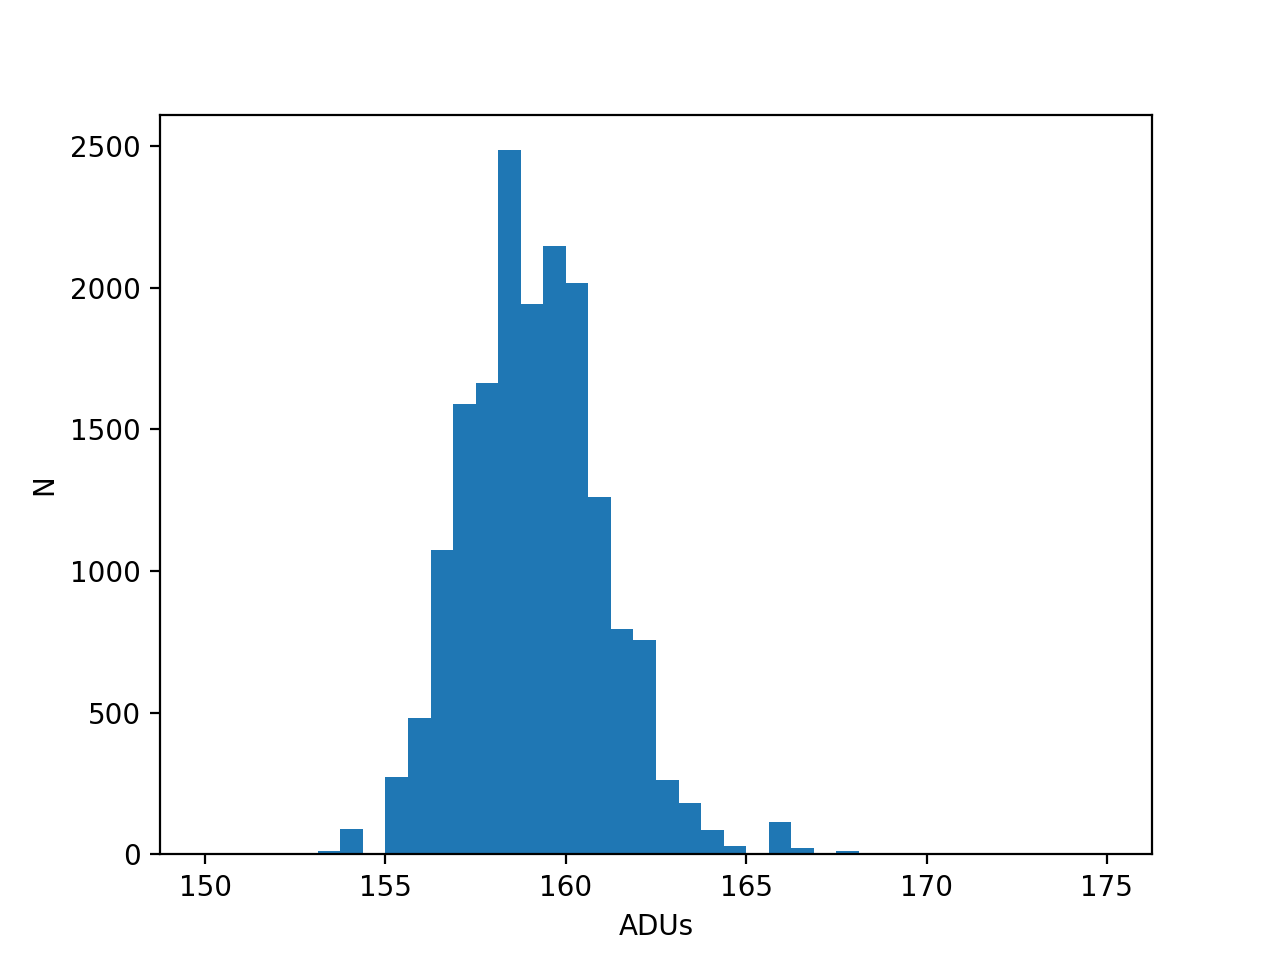

Text(0.5, 0, 'ADUs')

In [16]:
fig, ax = plt.subplots(1,1)
ax.hist(table[:,7], bins=40, range=(150,175))
ax.set_ylabel('N')
ax.set_xlabel('ADUs')

In [17]:
xfrac = table[:,2] - np.asarray(table[:,2], dtype=int)
yfrac = table[:,3] - np.asarray(table[:,3], dtype=int)

<IPython.core.display.Javascript object>


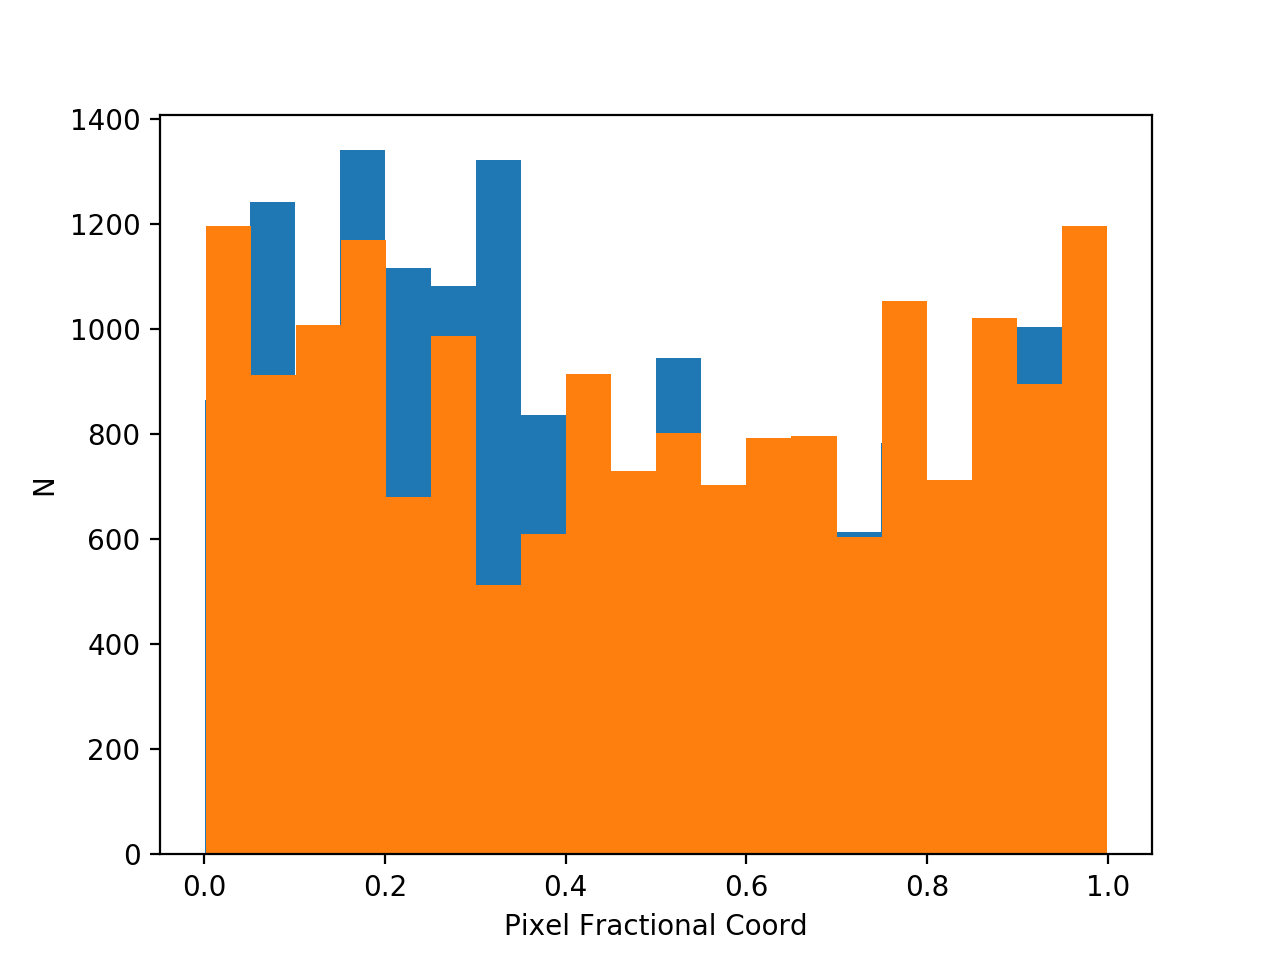

Text(0.5, 0, 'Pixel Fractional Coord')

In [18]:
fig, ax = plt.subplots(1,1)
ax.hist(xfrac, bins=20)
ax.hist(yfrac, bins=20)
ax.set_ylabel('N')
ax.set_xlabel('Pixel Fractional Coord')

In [19]:
centroids.__version__

'v0.1-99-gb87227f+'